# PCA Decomposition

Principal Components aims to reduce the dimensionality of a dataset; by finding the least amount of variables that explain the largest proportion of the data. It does this by transforming the data from a correlation matrix (more commonly used on financial data than a covariance matrix), onto a subspace with less dimensions, where all explanatory variables are orthogonal (perpendicular) to each other, i.e there is no multicollinearity. These are <b>statistical properties</b> and do not necesarrily have an economic interpretation.

For this analysis I will use the 10-year-yield for the US and UK to see if we can fiind an estimate for the long-term interest rate/term premium. It is commonly know that:

<b>PC1:</b> constant ~ long term interest rate ~ R*

<b>PC2:</b> slope ~ term premia

<b>PC3:</b> curvature

To read about this in more detail, read the PCA section of <i>"Market Risk Analysis II, Practical Financial Econometrics- Carol Alexander"</i>.

There is also a good paper here which uses PCA and macroeconomic variables: https://pdfs.semanticscholar.org/8736/5855217edbc53e5e29c5c5872db7efb907cc.pdf

In this code I perform PCA manually, but there is a module in scikit-learn which speeds up the process:

https://github.com/scikit-learn/scikit-learn/blob/b194674c4/sklearn/decomposition/_pca.py#L104

A bit more detail on how to do PCA in Python: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

# 1. Import and clean data

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import Bank of England spot curve data from excel
df = pd.read_excel("GLC Nominal month end data_1970 to 2015.xlsx", 
                   index_col=0, header=3, dtypes = "float64", sheet_name="4. spot curve", skiprows=[4])

# Select all of the data up to 10 years
df = df.iloc[:,0:20]

df.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0
years:,,,,,,,,,,,,,,,,,,,,
1970-01-31,NaN,8.635354,8.707430,8.700727,8.664049,8.618702,8.572477,8.528372,8.487617,8.450611,8.417442,8.388098,8.362503,8.340549,8.322116,8.307105,8.295429,8.287013,8.281788,8.279691
1970-02-28,NaN,8.413131,8.397269,8.370748,8.337633,8.301590,8.265403,8.230804,8.198713,8.169617,8.143742,8.121153,8.101810,8.085616,8.072457,8.062236,8.054864,8.050261,8.048354,8.049074
1970-03-31,NaN,7.744187,7.782761,7.795017,7.793104,7.784963,7.775288,7.766459,7.759564,7.755068,7.753158,7.753877,7.757181,7.762973,7.771153,7.781635,7.794347,7.809221,7.826197,7.845220
1970-04-30,NaN,7.606512,7.864352,7.973522,8.002442,7.992813,7.967524,7.938335,7.911422,7.890054,7.875751,7.868985,7.869583,7.877024,7.890789,7.910452,7.935656,7.966093,8.001490,8.041602
1970-05-31,NaN,7.391107,7.735838,7.862182,7.877510,7.840673,7.782249,7.718053,7.656856,7.603548,7.560502,7.528577,7.507706,7.497355,7.496983,7.506125,7.524371,7.551351,7.586723,7.630168


In [48]:
# Drop nan values
df = df.dropna(how="any")

In [49]:
df

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0
years:,,,,,,,,,,,,,,,,,,,,
1970-07-31,6.851663,7.192984,7.172977,7.106046,7.052308,7.017426,6.999836,6.997178,7.006922,7.026981,7.055778,7.092045,7.134708,7.182897,7.235951,7.293369,7.354758,7.419808,7.488263,7.559915
1970-08-31,6.876631,7.009475,7.056214,7.063535,7.059783,7.056839,7.059390,7.069081,7.086282,7.110972,7.142876,7.181523,7.226329,7.276754,7.332371,7.392836,7.457867,7.527223,7.600697,7.678102
1970-09-30,6.946397,7.028594,7.028011,7.018305,7.010835,7.009391,7.015409,7.028982,7.049692,7.077051,7.110540,7.149612,7.193718,7.242392,7.295273,7.352073,7.412557,7.476526,7.543809,7.614256
1970-10-31,7.093031,7.307172,7.378760,7.364677,7.324739,7.284578,7.253662,7.234917,7.228765,7.234892,7.252477,7.280377,7.317332,7.362291,7.414444,7.473152,7.537896,7.608244,7.683826,7.764320
1971-01-31,6.931904,6.928976,6.968589,7.035600,7.117854,7.207366,7.299816,7.392529,7.484111,7.574034,7.662224,7.748862,7.834202,7.918446,8.001752,8.084251,8.166048,8.247238,8.327899,8.408105
1971-02-28,7.120328,7.114441,7.111977,7.113033,7.134367,7.175268,7.231991,7.299932,7.374951,7.454388,7.536762,7.621280,7.707490,7.795103,7.883930,7.973854,8.064806,8.156753,8.249690,8.343629
1971-03-31,6.759320,6.706945,6.670580,6.672733,6.706921,6.763724,6.835943,6.917644,7.004602,7.094289,7.185259,7.276683,7.368048,7.459006,7.549320,7.638830,7.727425,7.815038,7.901626,7.987169
1971-04-30,5.933958,6.292680,6.377173,6.418705,6.466725,6.529528,6.605912,6.692213,6.785503,6.883734,6.985388,7.089335,7.194770,7.301123,7.407980,7.515037,7.622063,7.728884,7.835366,7.941404
1971-05-31,5.695735,5.598584,5.667526,5.863861,6.094123,6.323164,6.540225,6.743313,6.933193,7.111168,7.278741,7.437385,7.588238,7.732142,7.869741,8.001543,8.127961,8.249337,8.365963,8.478093


In [50]:
# Standardise the data in the df into z scores

df_std = ((df-df.mean()) / df.std())
df_std.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0
years:,,,,,,,,,,,,,,,,,,,,
1970-07-31,0.046342,0.137478,0.114726,0.075453,0.040053,0.011046,-0.011945,-0.029681,-0.042951,-0.052381,-0.058423,-0.061422,-0.061661,-0.059374,-0.054744,-0.047923,-0.039040,-0.028211,-0.015542,-0.001131
1970-08-31,0.052648,0.089836,0.084056,0.064191,0.042049,0.021638,0.004160,-0.010129,-0.021270,-0.029342,-0.034449,-0.036721,-0.036306,-0.033345,-0.027955,-0.020241,-0.010302,0.001768,0.015877,0.031936
1970-09-30,0.070268,0.094800,0.076648,0.052209,0.028983,0.008886,-0.007734,-0.021033,-0.031266,-0.038647,-0.043350,-0.045530,-0.045331,-0.042874,-0.038262,-0.031586,-0.022931,-0.012381,-0.000020,0.014073
1970-10-31,0.107300,0.167124,0.168778,0.143970,0.112772,0.082847,0.056698,0.034964,0.017657,0.004651,-0.004281,-0.009432,-0.011122,-0.009623,-0.005151,0.002111,0.012003,0.024380,0.039108,0.056058
1971-01-31,0.066607,0.068937,0.061040,0.056791,0.057549,0.062095,0.069180,0.077821,0.087419,0.097681,0.108503,0.119895,0.131914,0.144612,0.158027,0.172179,0.187077,0.202720,0.219093,0.236177


In [51]:
# Create a covariance matrix 

cov_matrix_array = np.array(np.cov(df_std, rowvar=False))

## 2. Compute the eigenvalues & eigenvectors of the correlation matrix

In [62]:
# Perform eigendecomposition

eigenvalues, eigenvectors = np.linalg.eig(corr_matrix_array)

# Put data into a DataFrame and save to excel
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,21))

df_eigval.to_excel("df_eigval.xlsx")
eigenvalues

array([1.96608424e+01, 3.09852494e-01, 2.48898530e-02, 3.49701416e-03,
       8.05608882e-04, 1.02750935e-04, 8.59903764e-06, 1.20913460e-06,
       9.34863268e-08, 1.48779978e-08, 2.83478469e-09, 5.90106953e-10,
       1.35020416e-10, 3.38837276e-11, 7.75822684e-12, 2.55909286e-12,
       1.11736391e-12, 2.91278373e-13, 6.58629317e-14, 1.03113920e-14])

In [53]:
# Save output to Excel
df_eigvec = pd.DataFrame(eigenvectors, index=range(1,21))

df_eigvec.to_excel("df_eigvec.xlsx")
eigenvectors

array([[ 2.16371103e-01, -4.76741954e-01,  5.68236802e-01,
         5.42866299e-01, -2.57846450e-01,  1.96657936e-01,
         5.29604754e-02, -1.76042848e-02,  5.40657796e-03,
         7.83010289e-04,  2.63640772e-04, -4.66589413e-05,
        -1.32071116e-05,  6.50374022e-06,  7.09774237e-07,
         2.46174479e-06,  3.84045065e-06, -1.44255157e-06,
         3.37470564e-07,  1.56078705e-07],
       [ 2.19679678e-01, -3.98920873e-01,  2.44808004e-01,
        -2.45550665e-01,  4.10235171e-01, -5.90760591e-01,
        -3.37693739e-01,  1.81819533e-01, -8.47814480e-02,
        -2.66989155e-02, -8.73960910e-03,  3.24289107e-03,
        -1.54749449e-03, -6.98409763e-04,  8.56113634e-05,
        -5.83807368e-06, -2.17344804e-05,  9.46260213e-06,
        -1.03367824e-05, -3.63023650e-06],
       [ 2.21913346e-01, -3.17187638e-01,  1.93177626e-02,
        -4.02909380e-01,  2.12709649e-01,  1.41278410e-01,
         4.73975974e-01, -4.74420782e-01,  3.63060417e-01,
         1.78736019e-01,  7.9

In [71]:
# Work out explained proportion 
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})


,Eigenvalues,Explained proportion
1,19.6608,98.30%
2,0.309852,1.55%
3,0.0248899,0.12%
4,0.00349701,0.02%
5,0.000805609,0.00%
6,0.000102751,0.00%
7,8.59904e-06,0.00%
8,1.20913e-06,0.00%
9,9.34863e-08,0.00%
10,1.4878e-08,0.00%


# 3. PCA projections 

In [54]:
principal_components = df_std.dot(eigenvectors)
principal_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
years:,,,,,,,,,,,,,,,,,,,,
1970-07-31,-0.032838,-0.204918,0.067482,-0.146593,-0.004550,-0.021740,0.001970,0.000828,0.000339,0.000108,4.999538e-05,-1.068932e-06,-2.262346e-07,-5.346786e-06,1.984039e-06,1.980522e-06,7.075951e-08,-2.237006e-07,2.345608e-07,1.063328e-08
1970-08-31,0.031877,-0.126833,0.062923,-0.105320,-0.031663,-0.008182,0.003184,0.001163,0.000124,-0.000057,1.648789e-05,-1.300173e-06,3.757927e-06,-3.429919e-06,-2.017032e-07,2.316713e-06,-5.062569e-08,-1.516163e-07,2.468590e-07,-1.057459e-08
1970-09-30,-0.009330,-0.150376,0.078643,-0.089315,-0.024882,-0.010703,0.002030,0.001370,0.000030,-0.000024,1.691636e-05,-3.531173e-06,7.747969e-06,-1.953565e-06,-7.394436e-07,1.256405e-06,-1.558537e-07,1.029709e-07,1.467056e-07,-3.054371e-08
1970-10-31,0.219963,-0.213589,0.048486,-0.144802,-0.037515,-0.004840,0.004415,0.001125,0.000176,-0.000110,-7.678133e-06,-1.353022e-05,8.052352e-06,-6.096845e-06,-4.117846e-07,2.860233e-06,-7.672365e-07,5.703405e-08,1.908246e-07,-3.782961e-08
1971-01-31,0.533525,0.219927,0.126723,-0.031135,-0.011024,-0.010590,0.002907,0.000231,-0.000051,-0.000002,1.162118e-05,9.638335e-06,8.792853e-06,4.268889e-06,-3.541674e-07,3.571511e-07,-1.368736e-07,6.247513e-08,5.889270e-08,-4.796363e-09
1971-02-28,0.476124,0.112777,0.175435,-0.068082,-0.014956,-0.009897,0.005793,0.000288,-0.000117,0.000013,6.861846e-05,-1.184830e-05,9.168277e-06,-4.851632e-07,2.405449e-06,1.351500e-06,-5.129641e-08,5.728110e-08,4.922128e-08,-2.509528e-08
1971-03-31,0.025140,0.135552,0.188131,-0.044933,-0.006552,-0.011007,0.003295,0.000197,-0.000210,-0.000028,1.977240e-05,-1.681622e-05,1.223629e-05,4.605001e-06,-4.226188e-07,2.092099e-07,-3.058932e-07,5.767237e-08,-1.480317e-08,-4.241470e-09
1971-04-30,-0.238664,0.289913,0.130225,-0.121154,0.001858,-0.017735,0.003236,0.000236,-0.000062,-0.000020,-3.284754e-05,1.996295e-08,2.560159e-05,8.524029e-06,-2.810794e-06,-1.175072e-06,3.788875e-07,1.431159e-07,8.745018e-08,6.570625e-09
1971-05-31,-0.097244,0.760261,0.205825,0.041957,-0.005567,-0.015866,-0.002540,0.000802,-0.000146,0.000052,1.493069e-05,8.739347e-06,-1.334174e-05,1.966798e-06,-3.858164e-06,-3.192635e-07,-9.848951e-07,3.200821e-07,-9.966749e-08,-1.428339e-08


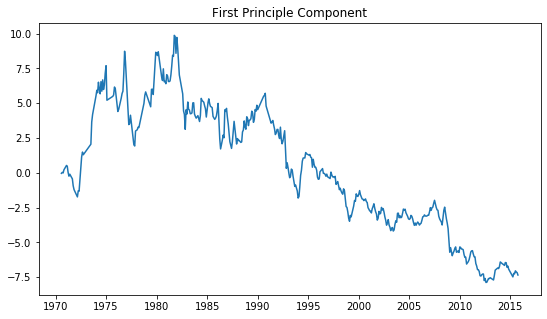

In [98]:
#plt.style.use('ggplot')
ax = plt.figure(figsize=(9,5))
ax = plt.plot(principal_components[0])
ax = plt.title("First Principle Component")

In [162]:
# Calaculate 10Y-2M slope

df_s = pd.DataFrame(data = df)
df_s = df_s[[2,10]]
df_s["slope"] = df_s[10] - df_s[2]
df_s.head()

,2.0,10.0,slope
years:,,,
1970-07-31,7.106046,7.559915,0.453869
1970-08-31,7.063535,7.678102,0.614567
1970-09-30,7.018305,7.614256,0.595951
1970-10-31,7.364677,7.764320,0.399643
1971-01-31,7.035600,8.408105,1.372505


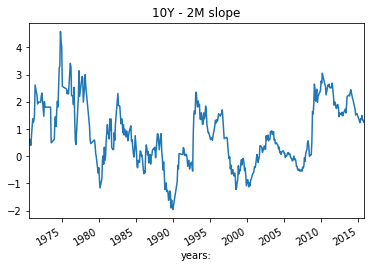

<Figure size 648x360 with 0 Axes>

In [167]:
ax = df_s.plot(y="slope", legend=False)
ax = plt.title("10Y - 2M slope")
ax = plt.figure(figsize=(9,5))

In [169]:
np.corrcoef(principal_components[1], df_s["slope"])

array([[1.        , 0.95856134],
       [0.95856134, 1.        ]])